[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ncerdan/HandsOnML/blob/master/Ch_09_Unsupervised_Learning.ipynb)

# Clustering

## K-Means

In [3]:
# make out dataset
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([
    [ 0.2,  2.3],
    [-1.5 ,  2.3],
    [-2.8,  1.8],
    [-2.8,  2.8],
    [-2.8,  1.3]                     
])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

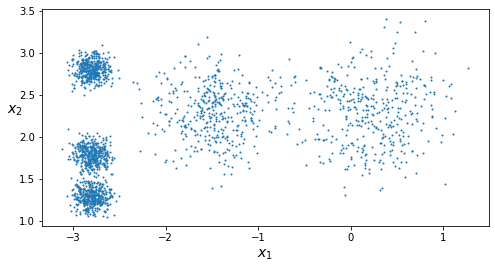

In [5]:
# now lets plot them
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [6]:
# now let's train on the clusters
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


In [7]:
# KMeans instance saves the label of each instance it was trained on
print(kmeans.labels_)
print(y_pred)

[4 4 0 ... 1 0 3]
[4 4 0 ... 1 0 3]


In [8]:
# it also stores the centroids
kmeans.cluster_centers_

array([[-1.43552655,  2.3081184 ],
       [-2.78859002,  1.79379472],
       [ 0.24574585,  2.29695113],
       [-2.80059137,  1.28824705],
       [-2.7930894 ,  2.80453375]])

In [9]:
# now you can easily predict new data
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 4, 4], dtype=int32)

In [10]:
# you can see the score of each class for data as follows
kmeans.transform(X_new)

array([[1.46822117, 2.79620366, 0.38544909, 2.88962009, 2.90665151],
       [4.44621555, 5.79226165, 2.77021586, 5.84409552, 5.84868869],
       [1.71063653, 1.22459192, 3.32101548, 1.72332875, 0.28463845],
       [1.5761966 , 0.73717032, 3.25209086, 1.2280509 , 0.36817496]])

### Centroid Initialization Methods

In [16]:
# you can manual set the init if you happen to know roughly where they should be
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)     # n_inits controls how many times to run the algorithm (default = 10)

In [20]:
# can view a models performance via its inertia (runs n_init times and picks one with lowest inertia)
kmeans.fit(X)
kmeans.inertia_

219.9533475159551

In [22]:
# its score contains the negative inertia
kmeans.score(X)

-219.9533475159556

### Accelerated K-Means and Mini-Batch K-Means

In [23]:
# sklearn runs accelerated by default

In [24]:
# sklearn implements the mini-batch version as follows
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [25]:
# if data does not fit in memory you can either use np.memmap (see Chp 8) or just
# run partial_fit on each mini-batch 

### Finding the Optimal Number of Clusters


In [ ]:
TODO